<a href="https://colab.research.google.com/github/Rohan5076/AIMLOPS/blob/main/M1_AST_01_SklearnPipeline_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 1: Pipeline Optimization with Scikit-Learn

## Learning Objectives

At the end of the experiment, you will be able to:

- appreciate the significance of a pipeline and its optimization
- setup a machine learning pipeline
- optimize the pipeline
- know techniques to analyze the results of optimization

## Information

**ML Pipeline**

A machine learning pipeline can be created by putting together a sequence of steps involved in training a machine learning model. It can be used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/regression, and post-processing steps. More complex applications may need to fit in other necessary steps within this pipeline.

**Problem Statement**

Substances in traditional fire-extinguishing techniques may leave chemical waste, harm human health and cause social and economic damages. Therefore research on fire-extinguishing using renewable energy sources is important. The impact of sound waves on flame and combustion behavior of fuel is a common.

Fire is a chemical reaction that breaks out with the combination of heat, fuel, and oxygen components. The heat, gas, and smoke resulting from this oxidation reaction may significantly harm to human and the environment. Early intervention to the fire facilitates to extinguish. However, **depending on the scale of the fire and the fuel type, fire-extinguishing agents may vary**. These substances in traditional fire-extinguishing techniques may leave chemical waste and harm human health. Additionally, it can also cause social and economic damages. In order to eliminate these impacts, researches on fire-extinguishing with renewable energy sources have been carried out. Currently, **the impact of sound waves on flame and combustion behavior of fuel is a common research topic**. The pressure changes in the air as a result of the sound waves lead to the occurrence of airflow. This airflow changes the behavior of the flame, fuel, and oxygen in the environment. The airflow created by the sound waves enables the fuel to spread over a wider surface. At this phase, the flame shows the tendency of spreading over a wide area together with the fuel. Fuel consumption also increases by the fuel particle oscillation due to the spread of flame and sound waves. While these stages are taking place, the air in the fire environment mixes and the amount of oxygen decreases as a result of the compression and expansion movements in the air. Through the combination of these three events, the flame can be extinguished. Necessary frequency ranges are available for the flame to be extinguished with the sound waves. Besides the frequency characteristic of sound waves, sound intensity level and the distance are also the factors having an impact on the ability to extinguish the flame.

Utilizing the fire characteristics, studies have been carried out to estimate the parameters necessary for the detection and extinguishing of the fire. The **data have been obtained by examining the characteristics of the flames extinguished using sound waves**. Statistical analysis and classification algorithms using these data provide information on the behaviour of the flame.


To know more about the experiment, click [here](https://ieeexplore.ieee.org/document/9452168).

## Dataset Description

The **Acoustic Extinguisher Fire Dataset** was obtained as a result of the extinguishing tests of four different fuel flames with a sound wave extinguishing system. The sound wave fire-extinguishing system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound frequencies are properly transmitted to the system is located within the control unit. While computer is used as frequency source, anemometer was used to measure the airflow resulted from sound waves during the extinguishing phase of the flame, and a decibel meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the fuel can, and a camera is installed to detect the extinction time of the flame. A total of 17,442 tests were conducted with this experimental setup.

The experiments are planned as follows:

- Three different liquid fuels and LPG fuel were used to create the flame.
- 5 different sizes of liquid fuel cans are used to achieve different size of flames.
- Half and full gas adjustment is used for LPG fuel.
- While carrying out each experiment, the fuel container, at 10 cm distance, was moved forward up to 190 cm by increasing the distance by 10 cm each time.
- Along with the fuel container, anemometer and decibel meter were moved forward in the same dimensions.
- Fire extinguishing experiments was conducted with 54 different frequency sound waves at each distance and flame size.
Throughout the flame extinguishing experiments, the data obtained from each measurement device was recorded and a dataset was created.


The dataset includes following features:

- **SIZE:** *fuel container size representing the flame size* [7cm=1, 12cm=2, 14cm=3, 16cm=4, 20cm=5, Half throttle setting=6, Full throttle=7]
- **FUEL:** *fuel type* [gasoline, thinner, kerosene, lpg]
- **FREQUENCY:** *sound frequency* [1 - 75 Hz]
- **DECIBEL:** *sound intensity* [72 - 113 dB]
- **DISTANCE:** *bw fuel container and fire-extinguishing system* [10 - 190 cm]
- **AIRFLOW:** *airflow resulted from sound waves* [0 - 17 m/s]
- **STATUS:** *flame extinction* [0 indicates the non-extinction state, 1 indicates the extinction state] ***(dependent/target variable)***

Accordingly, 6 input features and 1 output feature will be used in models.
The status property (flame extinction or non-extinction states) can be predicted by using six features in the dataset. Status and fuel features are categorical, while other features are numerical. 8,759 of the 17,442 test results are the non-extinguishing state of the flame. 8,683 of them are the extinction state of the flame. According to these numbers, it can be said that the class distribution of the dataset is almost equal.

To know more about the dataset, click [here](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset).

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2303863" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9403660142" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_01_SklearnPipeline_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import Required Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                 # For plotting data
import seaborn as sns                                           # For plotting data
from sklearn.model_selection import train_test_split            # For train/test splits
from sklearn.tree import DecisionTreeClassifier                 # Classifier model
from sklearn.feature_selection import VarianceThreshold         # Feature selector
from sklearn.pipeline import Pipeline                           # For setting up pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV                # For optimization

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [5]:
df = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx', sheet_name='A_E_Fire_Dataset')

# Shape of dataframe
df.shape

(17442, 7)

### Data Exploration

In [6]:
# Show first few rows of dataframe
df.head(8)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1


From above it can be seen that:

- There are 6 independent variables
- `FUEL` is a categorical feature
- Every other feature is numerical
- `STATUS` is the dependent variable
- It is a binary classification problem

### Segregating the dataframe into independent and dependent features

In [7]:
# The data matrix X
X = df.iloc[:, :-1]

# The labels
y = (df.iloc[:,-1:])

X.shape, y.shape

((17442, 6), (17442, 1))

In [8]:
# Independent features
X

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67
...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5
17438,7,lpg,190,84,2.0,4
17439,7,lpg,190,80,1.5,3
17440,7,lpg,190,76,0.4,2


### Exploring the unique categories in categorical feature

In [9]:
# Unique values in FUEL column
X['FUEL'].value_counts()

FUEL
gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: count, dtype: int64

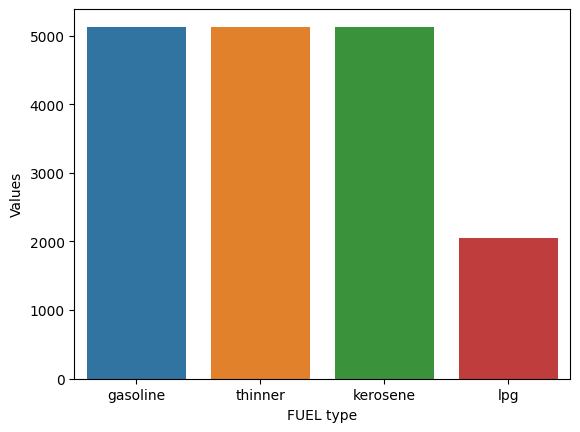

In [10]:
# Plot unique values in FUEL column
uniques = X['FUEL'].value_counts()
sns.barplot(x = uniques.index,
            y = uniques.values,
            hue=uniques.index            # color
            )
plt.xlabel("FUEL type")
plt.ylabel("Values")
plt.show()

### Encoding the Categorical Feature

In [11]:
# Ordinal encode input variable
ordinal = OrdinalEncoder()
X['FUEL'] = ordinal.fit_transform(X[['FUEL']])

In [12]:
X.tail(110)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
17332,7,2.0,170,78,1.4,2
17333,7,2.0,170,76,0.0,1
17334,7,2.0,180,104,0.0,75
17335,7,2.0,180,97,0.0,72
17336,7,2.0,180,96,0.0,70
...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5
17438,7,2.0,190,84,2.0,4
17439,7,2.0,190,80,1.5,3
17440,7,2.0,190,76,0.4,2


After ordinal encoding, all the features are numerical in nature now.

In [13]:
# Prediction features
X.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [14]:
# Target feature: Extinction Status
y

,STATUS
0,0
1,1
2,1
3,1
4,1
...,...
17437,0
17438,0
17439,0
17440,0


### Split the data into train and test sets

In [15]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,                  # predictors
                                                    y,                  # labels
                                                    test_size=1/3,      # test set size
                                                    random_state=0)     # set random number generator seed for reproducibility

print(X_train.shape)
print(X_test.shape)

(11628, 6)
(5814, 6)


### A Classifier Without a Pipeline and Optimization

First, let's just check how the DecisionTree performs on the training and test sets. This would give us a baseline for performance.



In [16]:
# Instantiate DecisionTree classifier and fit on train set
dt_model = DecisionTreeClassifier(max_depth = 4,              # The maximum depth of the tree
                                  max_features = 3,             # The number of features to consider when looking for the best split
                                  min_samples_leaf = 4              # The minimum number of samples required to be at a leaf node
                                  )

dt_model.fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(dt_model.score(X_train,y_train)))
print('Test set score: ' + str(dt_model.score(X_test,y_test)))

Training set score: 0.8663570691434469
Test set score: 0.8582731338149295


### Setting Up a Machine Learning Pipeline

- **Scaler:** For pre-processing data, i.e., transform the data to zero mean and unit variance using the `StandardScaler()`.
    - Scaling the features is not necessary for Tree based models like decision tree, xgboost, etc. Here, scaling is included inside pipeline for demonstration purpose.

- **Feature selector:** Use `VarianceThreshold()` for discarding features whose variance is less than a certain defined threshold.

- **Classifier:** `DecisionTreeClassifier()`, which implements a decision tree classifier.

In [17]:
# Setup pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', VarianceThreshold()),
                 ('classifier', DecisionTreeClassifier(max_depth = 4, max_features = 3, min_samples_leaf = 4))
                 ])

In [18]:
# Fit pipeline on train set
pipe.fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8786549707602339
Test set score: 0.8813209494324046


### Optimizing and Tuning the Pipeline with GridSearchCV

In the code below, we’ll show the following:

- We can search for the best scalers. Instead of just the `StandardScaler()`, we can try `MinMaxScaler()`, `Normalizer()`, and `MaxAbsScaler()`.

- We can search for the best variance threshold to use in the selector, i.e., `VarianceThreshold()`.

- We can search for the best value of max_depth for the `DecisionTreeClassifier()`.

In [19]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'selector__threshold': [0, 0.001, 0.01],
							'classifier__max_depth': [3, 4, 5, 6, 7],           # The maximum depth of the tree
							'classifier__max_features': [3, 4, 5],               # The number of features to consider when looking for the best split
							'classifier__min_samples_leaf': [1, 2, 3, 4]                # The minimum number of samples required to be at a leaf node
			  }

In [20]:
4*3*5*3*4

720

Here, we have passed a list of parameters that the GridsearchCV algorithm will use to come at an optimum solution. It will go through every combination of this parameters to get an optimal solution. So, total iterations here will be 4 $\times$ 3 $\times$ 5 $\times$ 3 $\times$ 4 = 720.

`max_depth`, `max_features` and `min_samples_leaf` are the parameter for `DecisionTreeClassifier()`.

To know more about `DecisionTreeClassifier()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [21]:
# Instantiate GridSearchCV
grid = GridSearchCV(estimator = pipe,                    # a scikit-learn model or pipeline
                    param_grid = parameters,             # Dictionary with parameters names as keys and lists of parameter settings to try as values
                    cv=2                             # Determines the cross-validation splitting strategy; to specify the number of folds in a (Stratified)KFold
                    )

grid.fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.9395424836601307
Test set score: 0.9339525283797729


To know more about GridSearchCV, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

### Analyzing the Results


In [22]:
# Access the best set of parameters
best_params = grid.best_params_
print("Best set of parameters:")
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print("\nOptimum pipeline:")
print(best_pipe)

Best set of parameters:
{'classifier__max_depth': 7, 'classifier__max_features': 5, 'classifier__min_samples_leaf': 4, 'scaler': MaxAbsScaler(), 'selector__threshold': 0.01}

Optimum pipeline:
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0.01)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=7, max_features=5,
                                        min_samples_leaf=4))])


Another useful technique for analyzing the results is to construct a DataFrame from the `grid.cv_results_` attribute.

In [23]:
# Create a dataframe
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__max_features',
       'param_classifier__min_samples_leaf', 'param_scaler',
       'param_selector__threshold', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [24]:
result_df.shape

(720, 15)

In [25]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009605,0.000393,0.006216,0.000158,3,3,1,StandardScaler(),0,"{'classifier__max_depth': 3, 'classifier__max_...",0.862573,0.867389,0.864981,0.002408,651
1,0.009853,0.000443,0.006171,0.000229,3,3,1,StandardScaler(),0.001,"{'classifier__max_depth': 3, 'classifier__max_...",0.869625,0.864637,0.867131,0.002494,618
2,0.009841,0.000369,0.006063,0.000169,3,3,1,StandardScaler(),0.01,"{'classifier__max_depth': 3, 'classifier__max_...",0.868421,0.856209,0.862315,0.006106,680
3,0.009749,0.000086,0.006397,0.000121,3,3,1,MinMaxScaler(),0,"{'classifier__max_depth': 3, 'classifier__max_...",0.872377,0.861713,0.867045,0.005332,622
4,0.009756,0.000199,0.006103,0.000150,3,3,1,MinMaxScaler(),0.001,"{'classifier__max_depth': 3, 'classifier__max_...",0.858445,0.871345,0.864895,0.006450,653


This DataFrame is very valuable as it shows us the scores for different parameters. The column with the `mean_test_score` is the average of the scores on the test set for all the folds during cross-validation. The DataFrame may be too big to visualize manually, hence, it is always a good idea to plot the results.

Let's see how `max_depth` affect the performance for different `scalers`, and for different values of `max_features`.

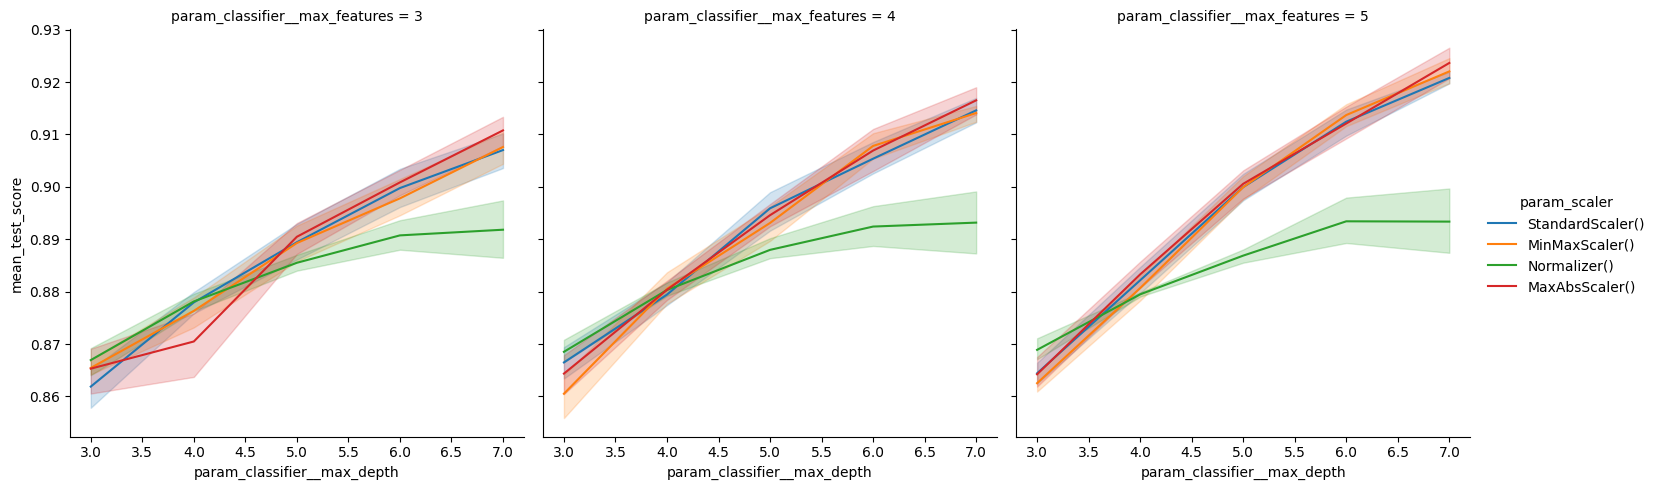

In [26]:
sns.relplot(data = result_df,
            kind = 'line',
			x = 'param_classifier__max_depth',
			y = 'mean_test_score',
			hue = 'param_scaler',
			col = 'param_classifier__max_features')
plt.show()

From the above plots, it can be seen that:

- For all `max_features = 3, 4, 5`, worst performing scaler method is `Normalizer()`
- For all `max_features = 3, 4, 5`, best performing scaler is `MaxAbsScaler()`
- Since the `mean_test_score` is still increasing we could check for few more sets of parameter values.

Let's see how `max_depth` affect the performance for different `scalers`, and for different values of `min_samples_leaf`.

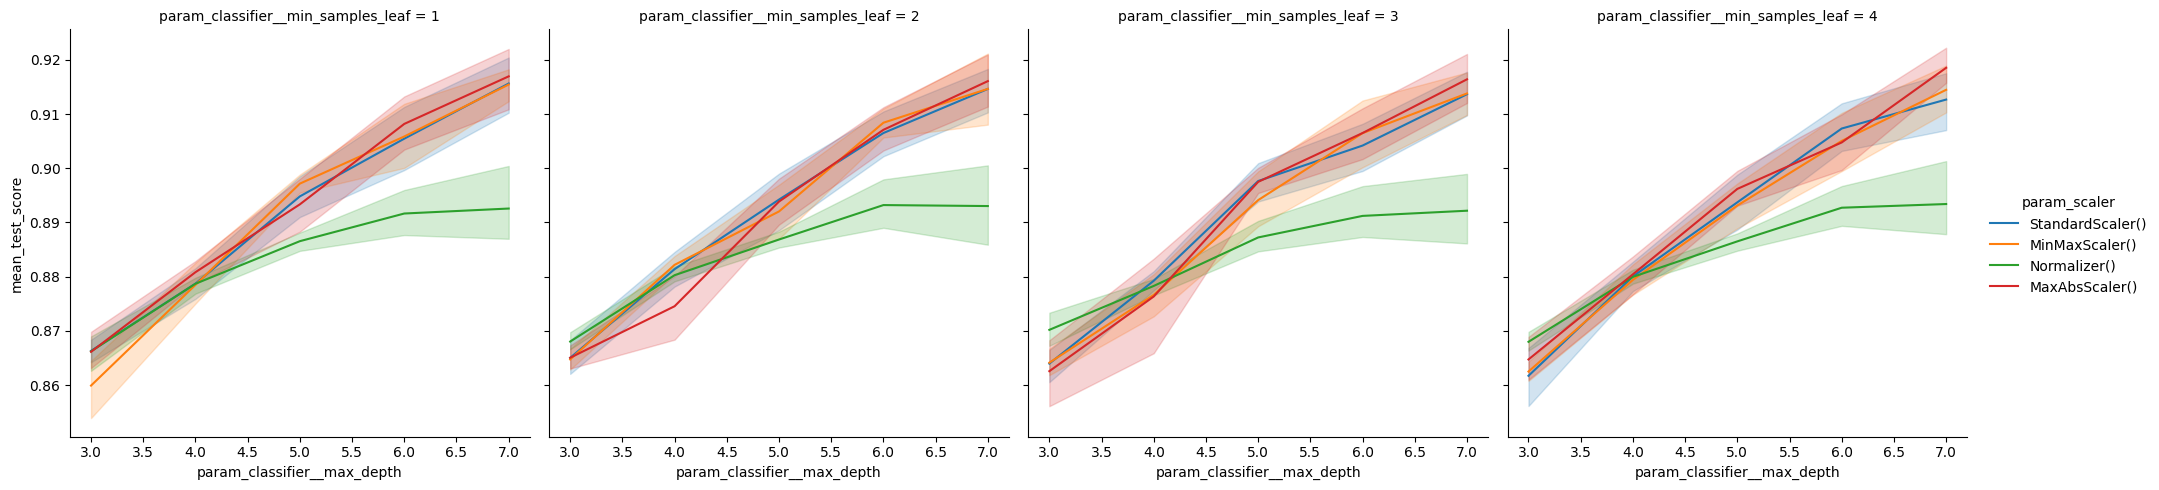

In [27]:
sns.relplot(data = result_df,
            kind = 'line',
			x = 'param_classifier__max_depth',
			y = 'mean_test_score',
			hue = 'param_scaler',
			col = 'param_classifier__min_samples_leaf')
plt.show()

- For all the `min_sampls_leaf` parameters, that is 1, 2, 3, 4, worst performing scaler method is `Normalizer()`.

- Since the `mean_test_score` is still increasing we might want to check for few more sets of parameter values.

`MaxAbsScaler()` performs well because it scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be $1.0$. It does not shift or center the data, and thus does not destroy any sparsity.

To know more about `MaxAbsScaler()`, refer [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler).

### Please answer the questions below to complete the experiment:




In [28]:
#@title Select the False statement regarding Scikit-learn Pipeline: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "With pipeline, all the preprocessing steps needs to be done separately for both training and testing set" #@param ["", "With pipeline, all the preprocessing steps needs to be done separately for both training and testing set", "Without pipeline, the parameters used for preprocessing of training set needs to be stored for preprocessing testing set", "With pipeline, doing the same preprocessing steps twice can be avoided"]

In [29]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [30]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [31]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [32]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [33]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Additional Question
